# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить ДВУМЯ способами: матричным и графическим. Для матричного способа программа должна выдавать значения x и y в одну строку через пробел. Для графического - график, на котором отмечены решения, если они есть.


Enter coefs a11, a12 and b1 separated by a space: 1 2 3
Enter coefs a21, a22 and b2 separated by a space: 1 2 13
This system has no solutions because straight lines are parallel.


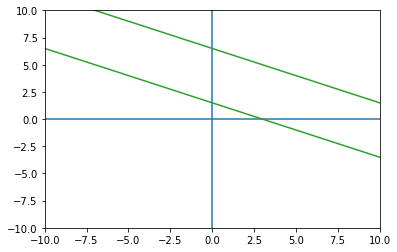

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a11, a12, b1 = map(float, input("Enter coefs a11, a12 and b1 separated by a space: ").split())
a21, a22, b2 = map(float, input("Enter coefs a21, a22 and b2 separated by a space: ").split())

plt.figure()

plt.xlim((-10, 10))  # Set x-axis range
plt.ylim((-10, 10))  # Set y-axis range
# Draw lines to split quadrants
plt.plot([-10, 10], [0, 0], color='C0')
plt.plot([0, 0], [-10, 10], color='C0')

if a11 == a21 and a12 == a22:
    if b1 == b2:
        print("The solution to this system is all points belonging to the straight line: ", end="")
        print("y = " + str(a11 / a12 * (-1)) + "x + " + str(b1 / a12))
        x = np.linspace(-10, 10)
        y = (b1 - a11 * x) / a12
        plt.plot(x, y, color='C2')
    else:
        print("This system has no solutions because straight lines are parallel.")
        x = np.linspace(-10, 10)
        y = (b1 - a11 * x) / a12
        plt.plot(x, y, color='C2')
        x = np.linspace(-10, 10)
        y = (b2 - a21 * x) / a22
        plt.plot(x, y, color='C2')
else:
    matrix = np.array([[a11, a12], [a21, a22]])
    vector = np.array([b1, b2])
    answers = np.linalg.solve(matrix, vector)
    print("x = " + str(answers[0]) + "; y = " + str(answers[1]))

    # Draw the first line
    x = np.linspace(-10, 10)
    y = (b1 - a11 * x) / a12
    plt.plot(x, y, color='C2')
    # Draw the second line
    y = (b2 - a21 * x) / a22
    plt.plot(x, y, color='C2')
    # Add solution
    plt.scatter(answers[0], answers[1], marker='x', color='black')
    # Annotate solution
    plt.annotate('({:0.3f}, {:0.3f})'.format(answers[0], answers[1]), answers + 0.5)

    plt.title('Solution of a system of linear equations')

plt.show()

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, используя пакет autograd из pyTorch для расчета производных и matplotlib для построения графиков.

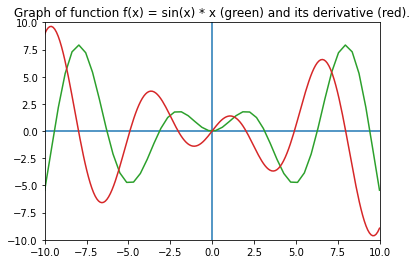

In [ ]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import elementwise_grad as egrad  # for functions that vectorize over inputs
import matplotlib.pyplot as plt


def function(x):
    y = np.sin(x) * x
    return y


plt.xlim((-10, 10))  # Set x-axis range
plt.ylim((-10, 10))  # Set y-axis range
# Draw lines to split quadrants
plt.plot([-10, 10], [0, 0], color='C0')
plt.plot([0, 0], [-10, 10], color='C0')
x = np.linspace(-10, 10)
y = function(x)
# draw function graph
plt.plot(x, y, color='C2')
plt.title('Graph of function f(x) = sin(x) * x (green) and its derivative (red).')
# draw graph of derivative of this function
x = np.linspace(-10, 10, 200)
plt.plot(x, egrad(function)(x), color='C3')
plt.show()